<a href="https://colab.research.google.com/github/Nawedul07/Diabetes_Prediction_model/blob/main/diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the dependencies **

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn. model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


# Loading the dataset

In [ ]:
dataset = pd.read_csv("/content/diabetes-dataset.csv")
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [ ]:
dataset.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [ ]:
dataset.tail()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1
1999,2,81,72,15,76,30.1,0.547,25,0


In [ ]:
dataset.shape


(2000, 9)

In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [ ]:
dataset["Outcome"].value_counts()

,count
Outcome,
0,1316
1,684


In [ ]:
dataset.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.168693,110.586626,68.094985,20.052432,70.563830,30.567477,0.434676,31.081307
1,4.732456,141.568713,71.166667,22.633041,98.897661,35.320468,0.540681,36.956140


**Visualization Using MatplotLib and Seaborn**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

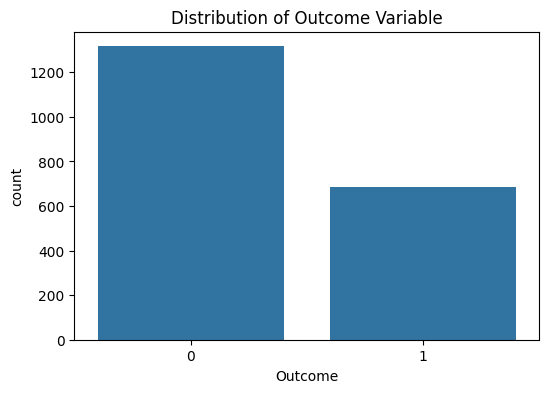

In [ ]:

# Visualize the distribution of the outcome variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=dataset)
plt.title('Distribution of Outcome Variable')
plt.show()


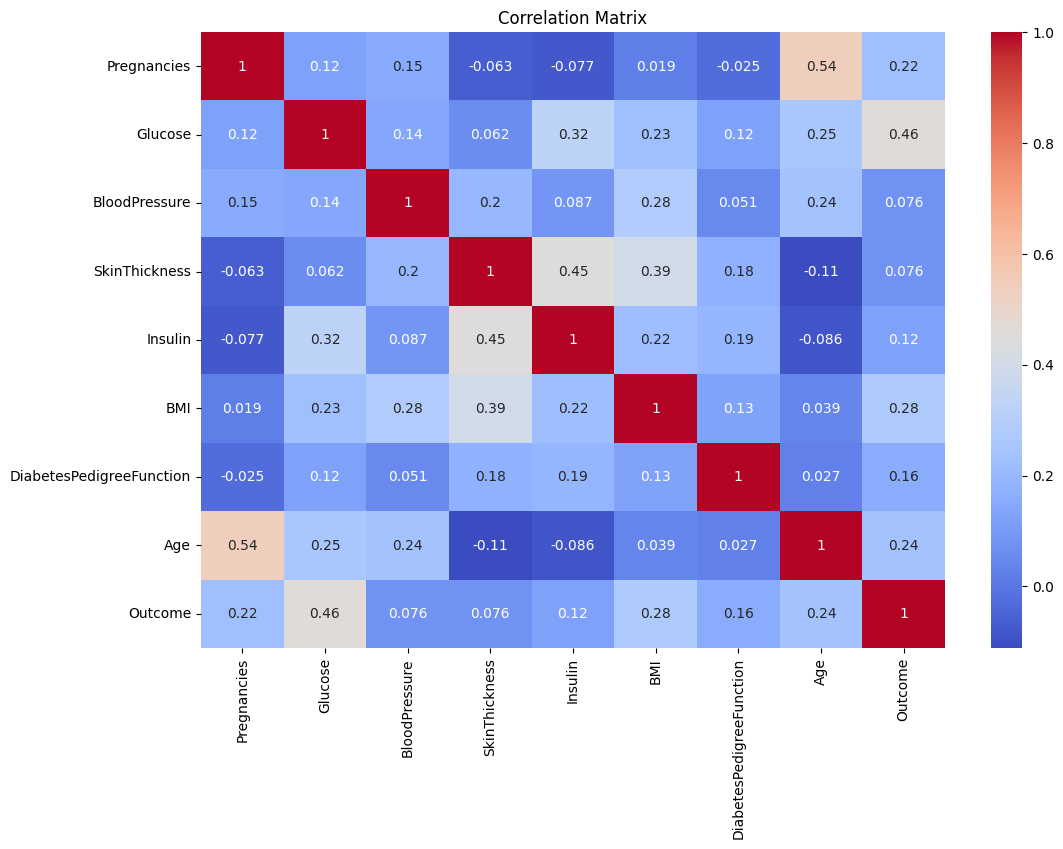

In [ ]:
# Visualize the correlation between features and outcome
plt.figure(figsize=(12, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

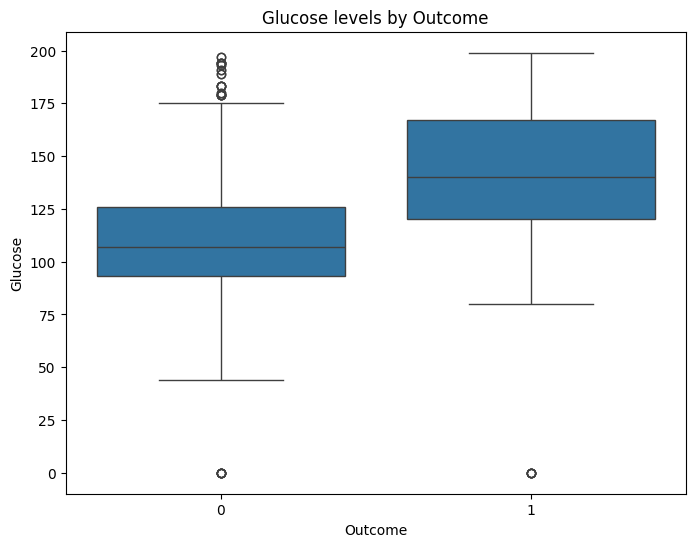

In [ ]:
# Visualize the relationship between Glucose and Outcome
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Glucose', data=dataset)
plt.title('Glucose levels by Outcome')
plt.show()

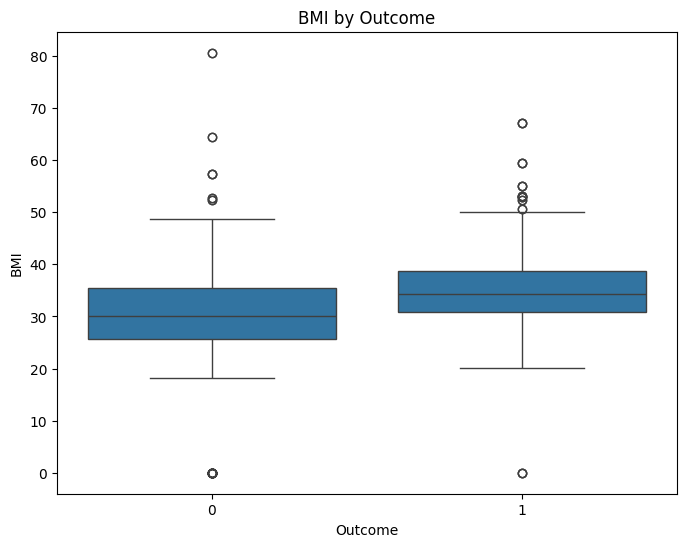

In [ ]:
# Visualize the relationship between BMI and Outcome
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='BMI', data=dataset)
plt.title('BMI by Outcome')
plt.show()

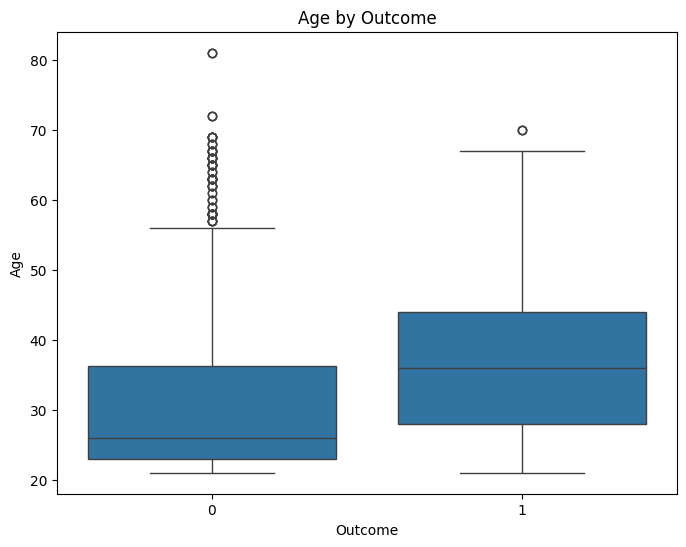

In [ ]:
# Visualize the relationship between Age and Outcome
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Age', data=dataset)
plt.title('Age by Outcome')
plt.show()

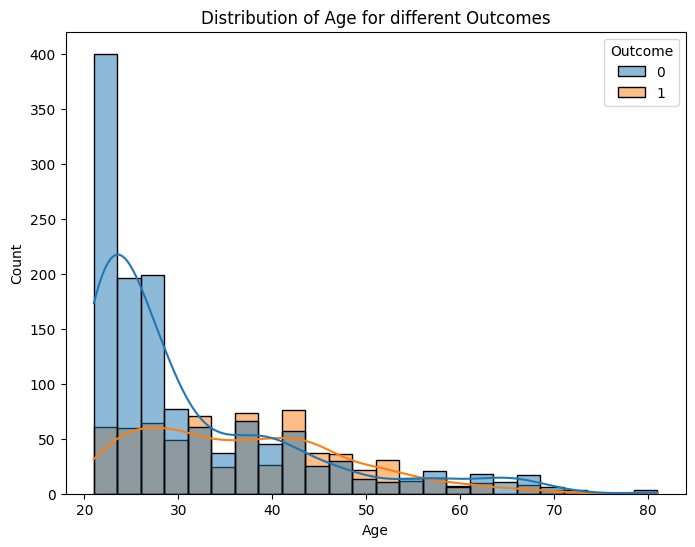

In [ ]:
# Visualize the distribution of Age for different outcomes
plt.figure(figsize=(8, 6))
sns.histplot(data=dataset, x='Age', hue='Outcome', kde=True)
plt.title('Distribution of Age for different Outcomes')
plt.show()


In [ ]:

# Pairplot to visualize relationships between multiple features
sns.pairplot(dataset, hue='Outcome')
plt.show()

**Model Training**

In [ ]:
# separating the data and labels
X = dataset.drop(columns = "Outcome", axis = 1)
Y = dataset["Outcome"]

In [ ]:
print(X)
print(Y)

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               2      138             62             35        0  33.6   
1               0       84             82             31      125  38.2   
2               0      145              0              0        0  44.2   
3               0      135             68             42      250  42.3   
4               1      139             62             41      480  40.7   
...           ...      ...            ...            ...      ...   ...   
1995            2       75             64             24       55  29.7   
1996            8      179             72             42      130  32.7   
1997            6       85             78              0        0  31.2   
1998            0      129            110             46      130  67.1   
1999            2       81             72             15       76  30.1   

      DiabetesPedigreeFunction  Age  
0                        0.127   47  
1                      

In [ ]:
# data standardization : standardize the data in a common range to make the model to predict better
# all the columns have diiferent values range which may lead to wrong prediction,
#  so standardization changes the diffferent ranges to a common range
scalar = StandardScaler()

In [ ]:
scalar.fit(X)

StandardScaler()

In [ ]:
standardized_data = scalar.transform(X)

In [ ]:
print(standardized_data)

[[-0.5153943   0.52455322 -0.37248123 ...  0.17268332 -1.06324616
   1.18042417]
 [-1.12049474 -1.1597562   0.67008046 ...  0.73724853 -0.7355513
  -0.85632626]
 [-1.12049474  0.74288962 -3.60442246 ...  1.47363794  0.49175869
  -0.17740945]
 ...
 [ 0.69480658 -1.12856529  0.46156812 ... -0.12187245 -0.27492362
   0.75610116]
 [-1.12049474  0.24383498  2.12966682 ...  4.28419085 -0.46968566
  -0.60173245]
 [-0.5153943  -1.25332895  0.14879962 ... -0.25687717  0.23516743
  -0.68659705]]


In [ ]:
X = standardized_data
Y = dataset["Outcome"]


In [ ]:
print(X)
print(Y)

[[-0.5153943   0.52455322 -0.37248123 ...  0.17268332 -1.06324616
   1.18042417]
 [-1.12049474 -1.1597562   0.67008046 ...  0.73724853 -0.7355513
  -0.85632626]
 [-1.12049474  0.74288962 -3.60442246 ...  1.47363794  0.49175869
  -0.17740945]
 ...
 [ 0.69480658 -1.12856529  0.46156812 ... -0.12187245 -0.27492362
   0.75610116]
 [-1.12049474  0.24383498  2.12966682 ...  4.28419085 -0.46968566
  -0.60173245]
 [-0.5153943  -1.25332895  0.14879962 ... -0.25687717  0.23516743
  -0.68659705]]
0       1
1       0
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    0
1998    1
1999    0
Name: Outcome, Length: 2000, dtype: int64


splitting the data into training and testing data


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 8) (1600, 8) (400, 8)


**Model -Training **

In [ ]:
# support vector machine (svm)
classifier = svm.SVC(kernel = "linear")

In [ ]:
#  training the support vector machine classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
# model evaluation
# Accuracy score
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)


In [ ]:
print("Accuracy score of the training data = ", training_data_accuracy)

Accuracy score of the training data =  0.775


In [ ]:
# Accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print("The Accuracy score of the prediction on the test data is :", test_data_accuracy)

The Accuracy score of the prediction on the test data is : 0.805


In [ ]:
# making a predictive system
input_data = (3,163,70,18,105,31.6,0.268,28)
# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
# standardize the input data
std_data = scalar.transform(input_data_reshaped)
print(std_data)
prediction = classifier.predict(std_data)
print(prediction)
if(prediction[0]== 0):
  print("the person is non-diabetic ")
else:
  print("the person is diabetic ")


[[-0.21284408  1.30432609  0.04454345 -0.18230701  0.2226306  -0.07277982
  -0.62735017 -0.43200325]]
[1]
the person is diabetic 


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# prompt: can you use different algorithms for the diabetes prediction model, to find the accuracy of each model and then use different accuracy measures like f1 score and others and then us k- fold to find the accuracy

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("/content/diabetes-dataset.csv")


# Define models
models = {
    "SVM (Linear)": svm.SVC(kernel="linear"),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}


# Function to evaluate a model
def evaluate_model(model, X_train, Y_train, X_test, Y_test):
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(classification_report(Y_test,y_pred))
    print(confusion_matrix(Y_test,y_pred))

    return accuracy, f1, precision, recall

# Split data
X = dataset.drop(columns = "Outcome", axis = 1)
Y = dataset["Outcome"]
scalar = StandardScaler()
scalar.fit(X)
standardized_data = scalar.transform(X)
X = standardized_data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)


# Evaluate each model and perform k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
  print(f"Evaluating {name}:")
  accuracy, f1, precision, recall = evaluate_model(model, X_train, Y_train, X_test, Y_test)

  cv_scores = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
  print(f"K-Fold Cross-Validation Scores: {cv_scores}")
  print(f"Mean Accuracy (K-Fold): {np.mean(cv_scores):.4f}")
  print("-" * 30)

Evaluating SVM (Linear):
Accuracy: 0.8050
F1 Score: 0.6777
Precision: 0.7810
Recall: 0.5985
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       263
           1       0.78      0.60      0.68       137

    accuracy                           0.81       400
   macro avg       0.80      0.76      0.77       400
weighted avg       0.80      0.81      0.80       400

[[240  23]
 [ 55  82]]
K-Fold Cross-Validation Scores: [0.78   0.7975 0.78   0.77   0.7575]
Mean Accuracy (K-Fold): 0.7770
------------------------------
Evaluating Logistic Regression:
Accuracy: 0.7850
F1 Score: 0.6356
Precision: 0.7576
Recall: 0.5474
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       263
           1       0.76      0.55      0.64       137

    accuracy                           0.79       400
   macro avg       0.78      0.73      0.74       400
weighted avg       0.78      0.79      0.77       400

[